In [2]:
import pandas as pd
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%cd /mnt/Zika_subgenomic_plotting/plotting/original_depth

/mnt/Zika_subgenomic_plotting/plotting/original_depth


In [4]:
depth = pd.read_csv("ERR1802073.tsv", sep="\t", names=["Virus", "Position", "Read Coverage"])
depth = depth.drop(columns=["Virus"])
depth.set_index("Position", inplace=True)

# depth_av = depth['Read Coverage'].rolling(window=50, center=True).mean()

coverage = depth['Read Coverage'].values.reshape(-1,1)

In [ ]:
algo = rpt.Dynp(model="l2", min_size=10)
algo.fit(coverage)
result = algo.predict(n_bkps=1)

rpt.display(coverage, [], result)
plt.savefig('/mnt/Zika_subgenomic_plotting/dynp.png')
result

[10475, 10808]

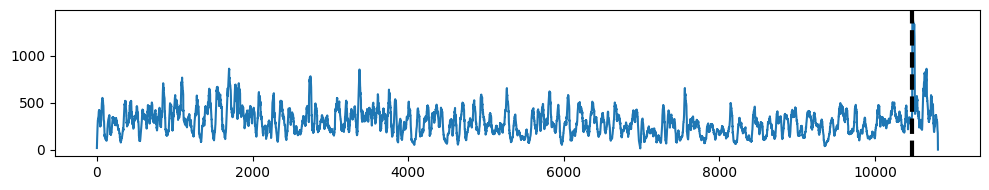

In [6]:
algo = rpt.Binseg(model="l2", min_size=10)
algo.fit(coverage)
result = algo.predict(n_bkps=1)
rpt.display(coverage, [], result)
result

[np.int64(10475), 10808]

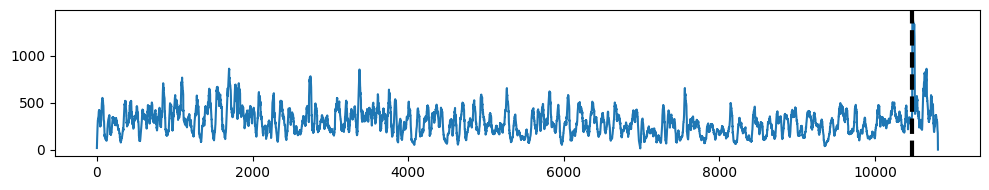

In [7]:
algo = rpt.Window(model="l2", width=10)
algo.fit(coverage)
result = algo.predict(n_bkps=1)
rpt.display(coverage, [], result)
result

[10480, 10808]

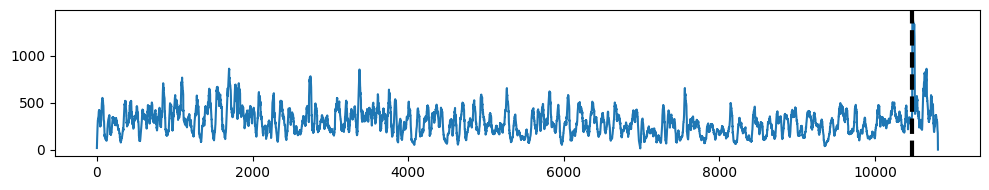

In [8]:
algo = rpt.BottomUp(model="l2", min_size=10)
algo.fit(coverage)
result = algo.predict(n_bkps=1)
rpt.display(coverage, [], result)
result

[10, 10808]

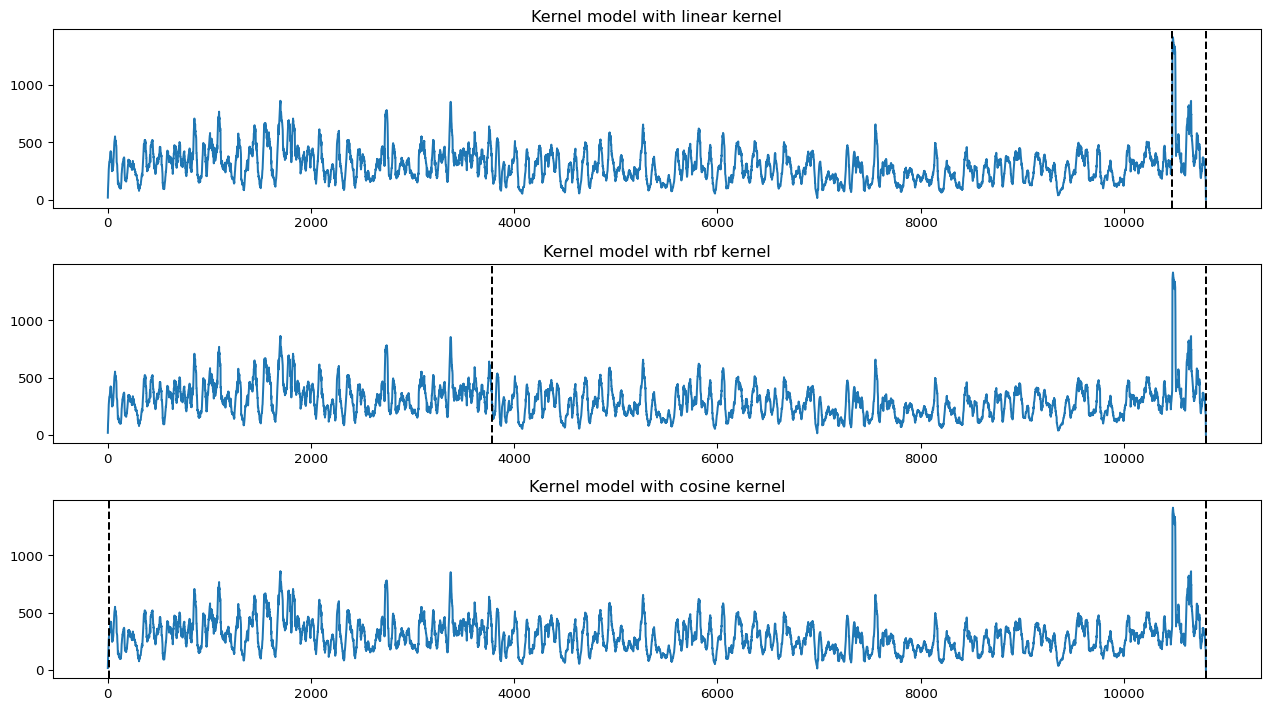

In [9]:
fig, ax = plt.subplots(3,1, figsize=(1280/96, 720/96), dpi=96)

for i, kernel in enumerate(['linear', 'rbf', 'cosine']):
    algo = rpt.KernelCPD(kernel=kernel, min_size=10)
    algo.fit(coverage)
    result = algo.predict(n_bkps=1)
    ax[i].plot(coverage)
    for bkp in result:
        ax[i].axvline(x=bkp, color='k', linestyle='--')
    ax[i].set_title(f"Kernel model with {kernel} kernel")
fig.tight_layout()
result